# Divide a Reduced Sample Set into Clusters

**Data sample**

Here, we extend the data set discussed in *red_sample_v1_...ipynb*. In particular, we consider: $g_{BB}=g_{CC}=0$. Instead of setting $g_{BC}=0$, we do not apply any restrictions to this parameter.

**Expectation**

Remind, we try to cluster the correlation plots of species B and C (both bosonic), while species A (fermionic) acts as a mediator.

We expect an induced attraction between B and C, when gAB * gAC > 0 and an induced repulsion for gAB * gAC < 0.
An induced attraction (repulsion) potentially leads to a correlated (anti-correlated) behavior.
However, this induced interaction needs to be compared with the intraspecies interaction strength gBC,

We expect roughly an behavior like:
- gAB * gAC + gBC < 0: correlation
- gAB * gAC + gBC > 0: anti-correlation


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import helper_fcts


## 1. Reduce the sample set

Filter data according to $g_{BB}=g_{CC}=0$.
For simplification, we exclude parameter combinations, where the correlation-function becomes zero everywhere, e.g., when $g_{AB} = g_{AC}=g_{BC}=0$.

In [2]:
df_pca = pd.read_pickle('df_main_std_pca_50.p')

mask_gBB0_gCC0 = (
    (df_pca.loc[:, 'gBB'] == 0) &
    (df_pca.loc[:, 'gCC'] == 0)
)

mask_gAB0_gAC0_gBC0 = (
    (df_pca.loc[:, 'gAB'] == 0) &
    (df_pca.loc[:, 'gAC'] == 0) &
    (df_pca.loc[:, 'gBC'] == 0)
)

mask = mask_gBB0_gCC0 & ~mask_gAB0_gAC0_gBC0

df_red = df_pca.loc[mask, :].copy()


features = df_red.iloc[:, 6:]

# combine parameters
df_red.loc[:, 'gAB * gAC'] = df_red.loc[:, 'gAB'] * df_red.loc[:, 'gAC']

# number of samples:
df_red.shape

(1486, 57)

## 2. K-Means

Check out *within-cluster sum of squares*values

In [3]:
wcss = []
for number_of_clusters in range(1, 10):
    model = KMeans(
        n_clusters=number_of_clusters,
        random_state=0
    )
    model.fit(features)
    wcss.append(model.score(features))

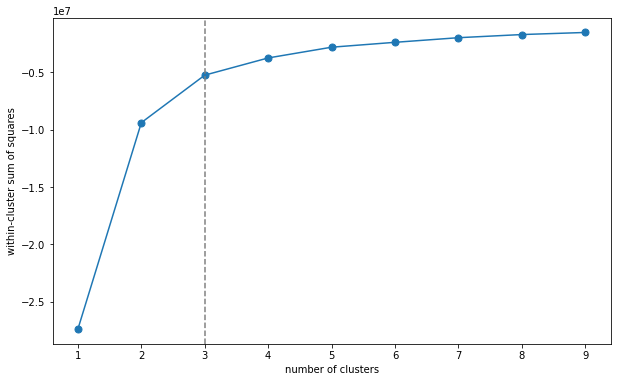

In [4]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.plot(range(1, 10), wcss, marker='o', markersize=7)

ax.set_xlabel('number of clusters')
ax.set_ylabel('within-cluster sum of squares')
ax.axvline(3, color='gray', ls='--');

### 2.1 Vary n Clusters

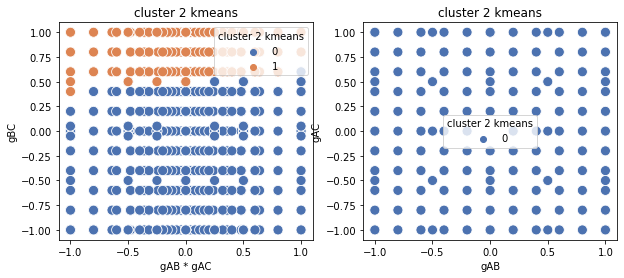

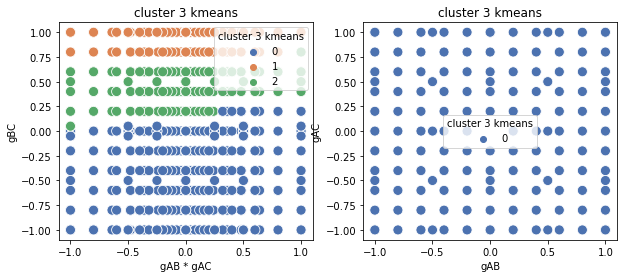

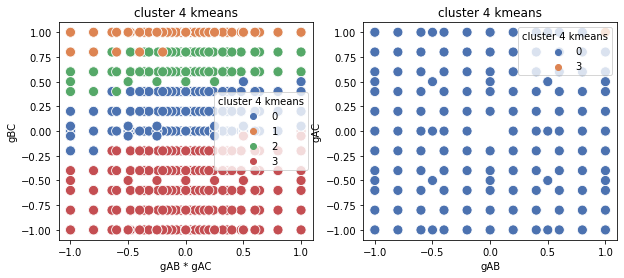

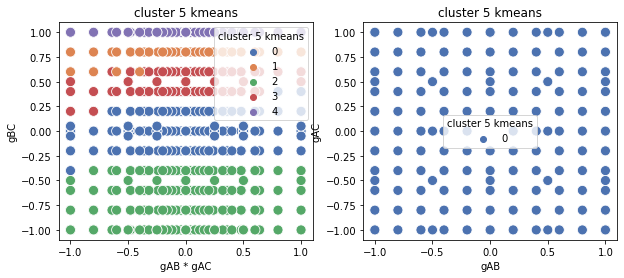

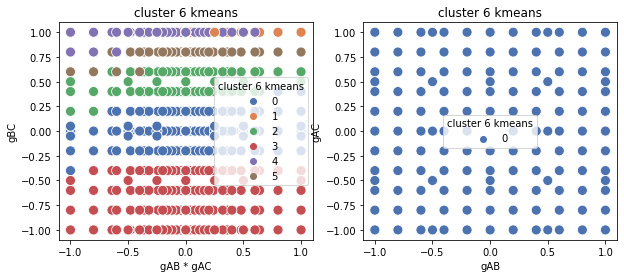

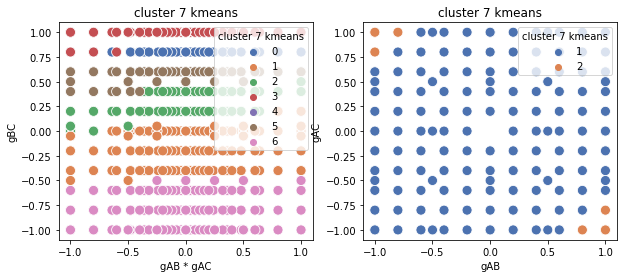

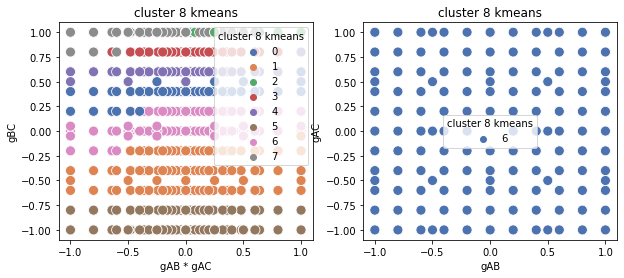

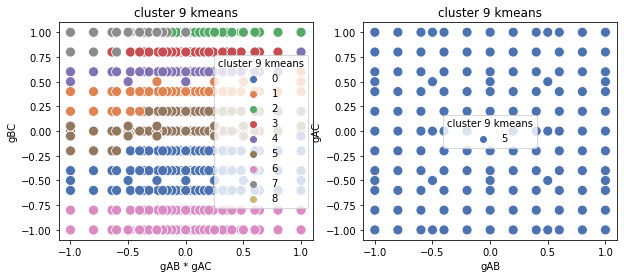

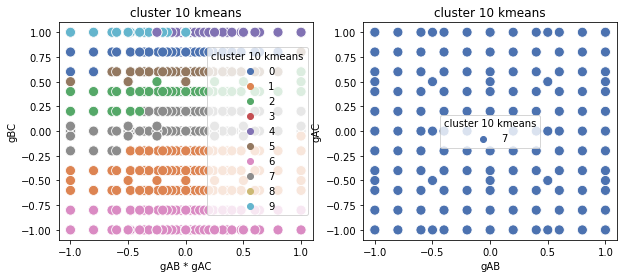

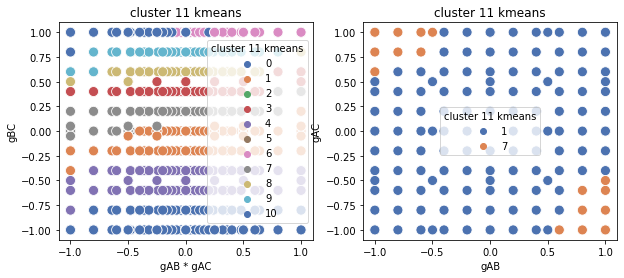

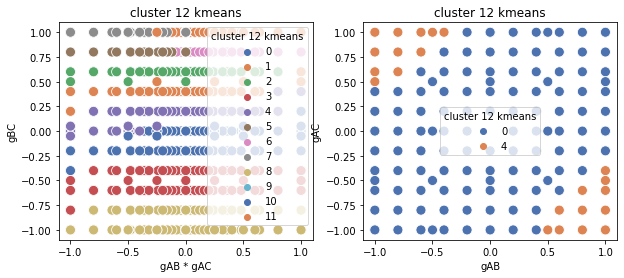

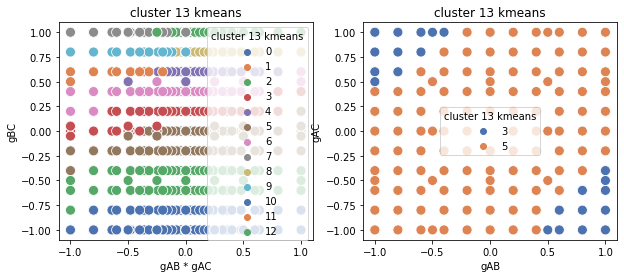

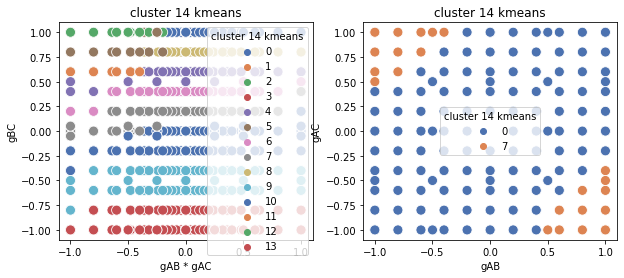

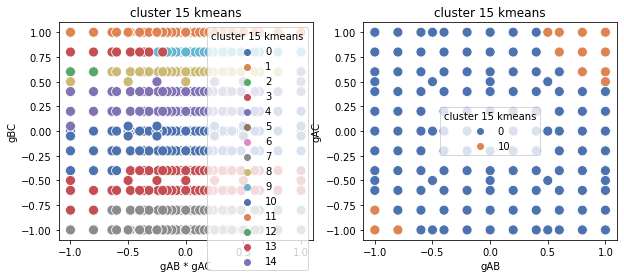

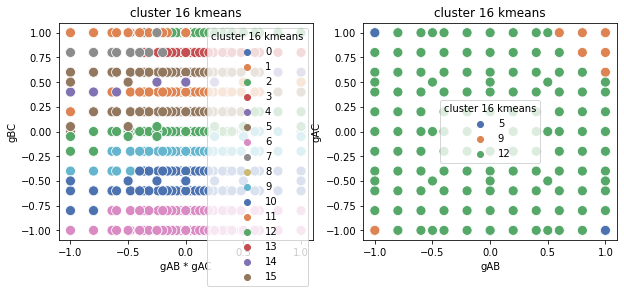

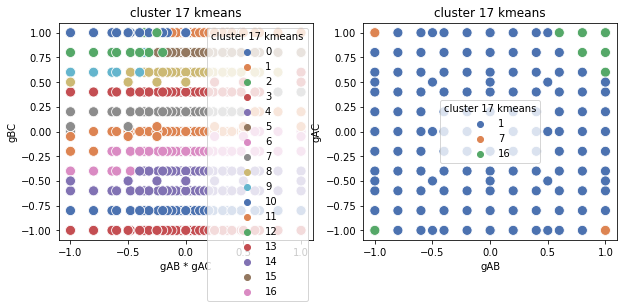

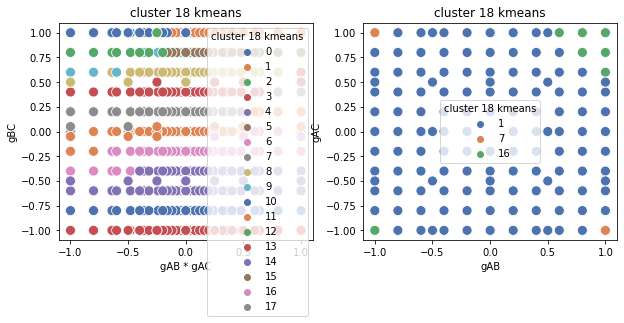

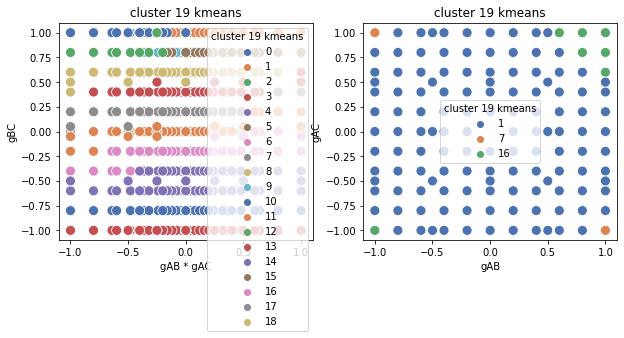

In [5]:
%matplotlib inline
for n_clusters in range(2, 20):

    model = KMeans(
        n_clusters=n_clusters,
        random_state=0
    )

    model.fit(features)

    df_red.loc[:, f'cluster {n_clusters} kmeans'] = model.labels_
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.scatterplot(
        x='gAB * gAC',
        y='gBC',
        hue=f'cluster {n_clusters} kmeans',
        data=df_red,
        palette='deep',
        alpha=1,
        ax=axes[0],
        s=100
    )
    axes[0].set_title(f'cluster {n_clusters} kmeans')
    
    sns.scatterplot(
        x='gAB',
        y='gAC',
        hue=f'cluster {n_clusters} kmeans',
        data=df_red.loc[df_red.loc[:, 'gBC']==0, :],
        palette='deep',
        alpha=1,
        ax=axes[1],
        s=100
    )
    axes[1].set_title(f'cluster {n_clusters} kmeans')
    
    
    
    plt.show()

### 2.2 Plot Examples

sample 0 gBB=0.0, gCC=0.0, gAB=0.0, gAC=-0.2, gBC=-1.0 index: 7304
sample 1 gBB=0.0, gCC=0.0, gAB=-0.8, gAC=-0.2, gBC=-0.8 index: 1980
sample 2 gBB=0.0, gCC=0.0, gAB=0.8, gAC=-0.8, gBC=-0.4 index: 12598
sample 3 gBB=0.0, gCC=0.0, gAB=-0.6, gAC=-0.2, gBC=-0.2 index: 3315
sample 4 gBB=0.0, gCC=0.0, gAB=-0.8, gAC=-1.0, gBC=0.0 index: 1940
sample 0 gBB=0.0, gCC=0.0, gAB=0.6, gAC=0.4, gBC=0.0 index: 11335
sample 1 gBB=0.0, gCC=0.0, gAB=-1.0, gAC=0.6, gBC=-0.6 index: 695
sample 2 gBB=0.0, gCC=0.0, gAB=0.2, gAC=1.0, gBC=0.0 index: 8706
sample 3 gBB=0.0, gCC=0.0, gAB=-0.8, gAC=-0.8, gBC=0.0 index: 1951
sample 4 gBB=0.0, gCC=0.0, gAB=0.8, gAC=0.2, gBC=-0.8 index: 12651


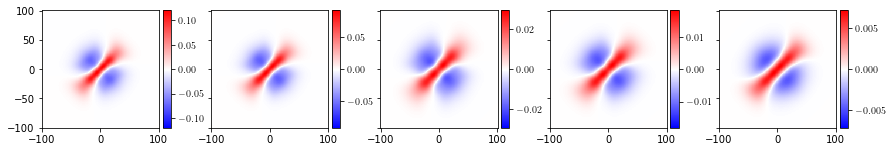

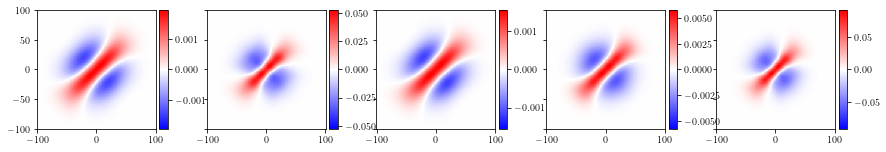

In [6]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 3 kmeans', cluster_id=0, seed=0)
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 3 kmeans', cluster_id=0, seed=1)

sample 0 gBB=0.0, gCC=0.0, gAB=-0.8, gAC=0.4, gBC=0.8 index: 2021
sample 1 gBB=0.0, gCC=0.0, gAB=0.2, gAC=-1.0, gBC=1.0 index: 8601
sample 2 gBB=0.0, gCC=0.0, gAB=-0.4, gAC=-0.4, gBC=1.0 index: 4640
sample 3 gBB=0.0, gCC=0.0, gAB=-1.0, gAC=0.8, gBC=0.8 index: 713
sample 4 gBB=0.0, gCC=0.0, gAB=0.8, gAC=1.0, gBC=0.8 index: 12703
sample 0 gBB=0.0, gCC=0.0, gAB=-1.0, gAC=0.5, gBC=1.0 index: 14960
sample 1 gBB=0.0, gCC=0.0, gAB=0.8, gAC=0.2, gBC=1.0 index: 12660
sample 2 gBB=0.0, gCC=0.0, gAB=1.0, gAC=-1.0, gBC=1.0 index: 13924
sample 3 gBB=0.0, gCC=0.0, gAB=0.5, gAC=0.5, gBC=1.0 index: 16835
sample 4 gBB=0.0, gCC=0.0, gAB=-0.2, gAC=0.8, gBC=0.8 index: 6037


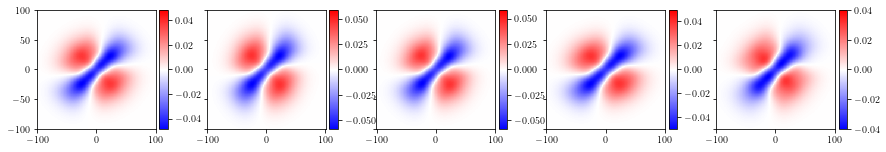

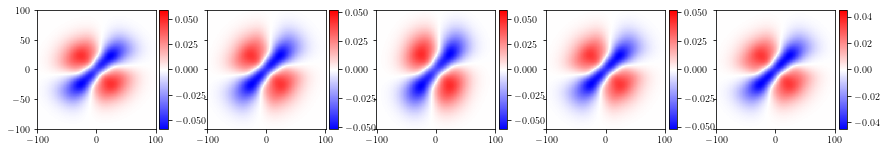

In [7]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 3 kmeans', cluster_id=1, seed=0)
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 3 kmeans', cluster_id=1, seed=1)

sample 0 gBB=0.0, gCC=0.0, gAB=0.6, gAC=0.4, gBC=-0.2 index: 11334
sample 1 gBB=0.0, gCC=0.0, gAB=-0.4, gAC=0.2, gBC=0.0 index: 4668
sample 2 gBB=0.0, gCC=0.0, gAB=1.0, gAC=0.0, gBC=-0.2 index: 13973
sample 3 gBB=0.0, gCC=0.0, gAB=-1.0, gAC=-0.4, gBC=0.0 index: 643
sample 4 gBB=0.0, gCC=0.0, gAB=0.5, gAC=1.0, gBC=0.05 index: 18005
sample 0 gBB=0.0, gCC=0.0, gAB=-1.0, gAC=0.0, gBC=0.0 index: 665
sample 1 gBB=0.0, gCC=0.0, gAB=-0.8, gAC=0.8, gBC=-0.2 index: 2038
sample 2 gBB=0.0, gCC=0.0, gAB=0.0, gAC=0.4, gBC=-0.2 index: 7341
sample 3 gBB=0.0, gCC=0.0, gAB=-0.4, gAC=0.8, gBC=-0.2 index: 4700
sample 4 gBB=0.0, gCC=0.0, gAB=-0.6, gAC=0.0, gBC=0.0 index: 3327


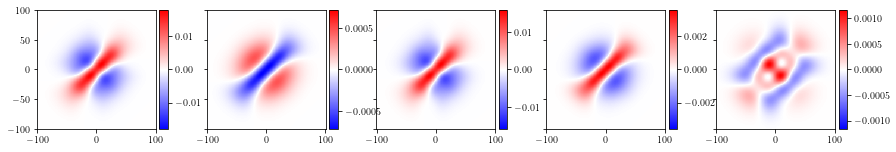

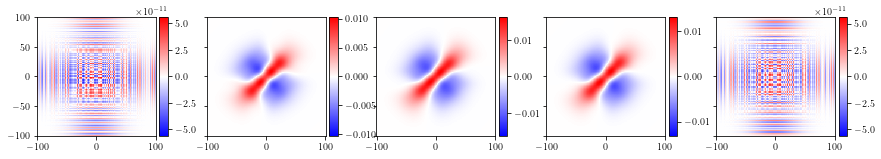

In [8]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 12 kmeans', cluster_id=0, seed=0)
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster 12 kmeans', cluster_id=0, seed=1)

### 2.3 Further Checks

<IPython.core.display.Javascript object>


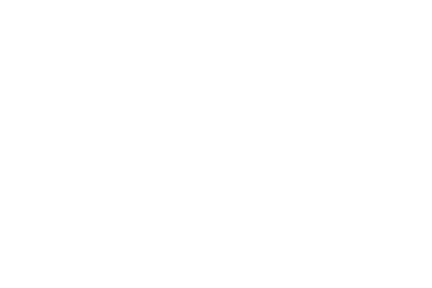

In [9]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use scatter, coloring by 's', with a colormap
sc = ax.scatter(
    df_red['gAB'],
    df_red['gAC'],
    df_red['gBC'],
    c=df_red['cluster 3 kmeans'],
    cmap='viridis',
    s=50
)

# Add colorbar to show 's' scale
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('s (color scale)')

ax.set_xlabel('gAB')
ax.set_ylabel('gAC')
ax.set_zlabel('gBC')


plt.show()


In [10]:
%matplotlib inline

## 3. DBSCAN

### 3.1 Hyperparameter tuning with K-Nearest Neighbours

For each data point calculate the distance to the $k$-th neighbor. Then sort the values. We are interested in the distance associated with the appearance of a *knee* in the plot (elbow point). Since the knee potentially represents a change from a core point (in dense regions) to noise points (in sparser regions) and suggests a natural cut-off for clustering.

Note that a rule of thumb for the min_samples in DBSCAN is: min_samples = 2*number of features = 20

Good starting point for k-th nearest neighbor: $k=\sqrt{N}$, where $N$ is the number of data points.

In [11]:
def evaluate_DBSCAN(min_samples, eps):
    """Make sns scatterplot for given hyperparameters.
    
    Args:
        min_samples (int): number of minimal samples for cluster
        eps (float): 
    
    
    """
    model_db = DBSCAN(eps=eps, min_samples=min_samples)
    model_db.fit(features)

    # Scatterplot of data with obtained labels
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.scatterplot(
        x='gAB * gAC',
        y='gBC',
        hue=model_db.labels_,
        data=df_red,
        palette='deep',
        alpha=1,
        ax=axes[0],
        s=100
    )    
    
    mask_gBC0 = df_red.loc[:, 'gBC'] == 0
    sns.scatterplot(
        x='gAB',
        y='gAC',
        hue=model_db.labels_[mask_gBC0],
        data=df_red.loc[mask_gBC0, :],
        palette='deep',
        alpha=1,
        ax=axes[1],
        s=150
    )
    
    axes[0].set_title(f'min samples={min_samples}, seps={eps:.3f}', x=1)

    
    
    plt.show()

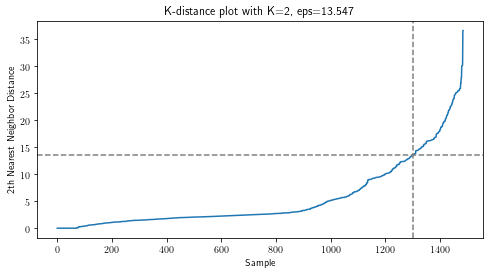

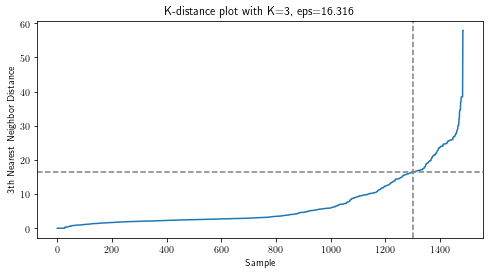

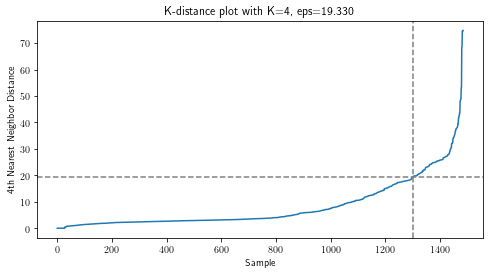

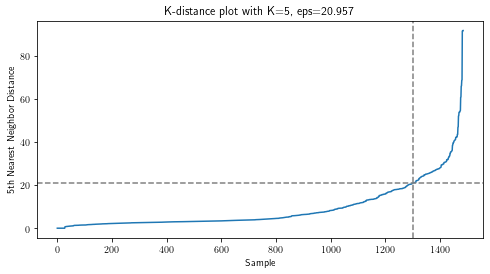

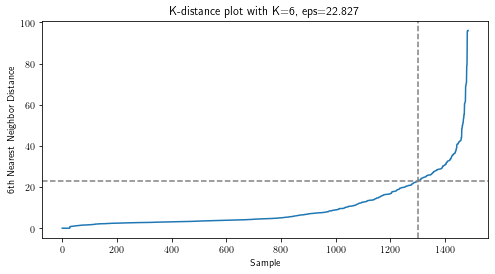

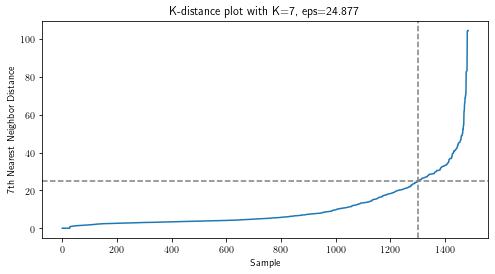

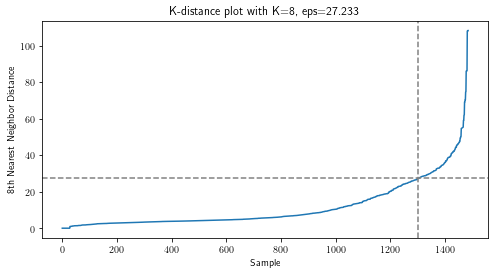

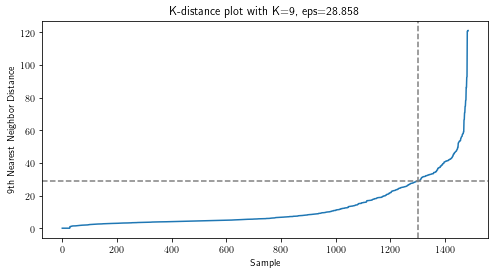

In [12]:
for k in range(2, 10):
    helper_fcts.plot_kNN_distance(features, k=k, elbowpoint=1300)

### k=2

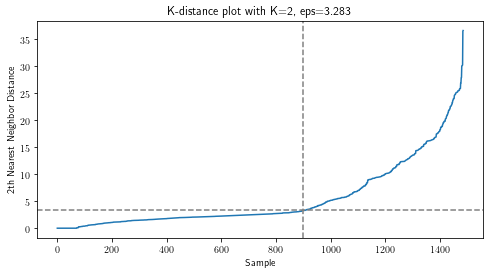

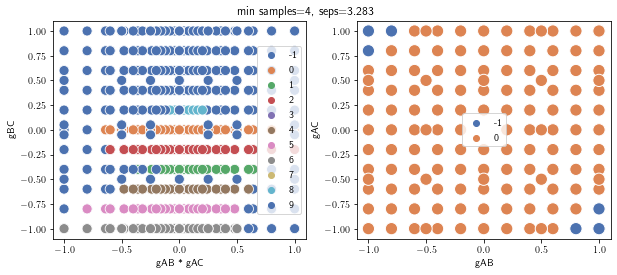

In [13]:
eps_k2 = helper_fcts.plot_kNN_distance(features, k=2, elbowpoint=900)
evaluate_DBSCAN(min_samples=4, eps=eps_k2)

## 4 Summary

Using k-means and DBSCAN no hyper-parameter setting was able to pass the sanity check, i.e., to correctly classify the patterns appearing in the plane $g_{AB}$-$g_{AC}$ for $g_{BC}=g_{BB}=g_{CC}=0$.

This might be due the fact that the clustering algorithms cluster the correlation matrices according to absolute values and not according to the pattern of the matrices.

**Next**

Normalize each correlation matrix so that we only sort the correlation matrices according to their patterns.